<a href="https://colab.research.google.com/github/kim-hyun-ho/study/blob/main/210417.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [27]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/otto.zip (Unzipped Files)/train.csv")

data

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,...,0,0,2,0,0,11,0,1,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,7,2,2,0,0,0,58,0,10,0,0,0,0,0,3,0,...,1,0,0,0,0,0,0,0,0,0,2,1,5,0,0,4,0,0,2,1,0,1,0,0,1,1,2,2,0,22,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,Class_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,61874,1,0,0,1,1,0,0,0,0,0,0,1,3,0,0,9,0,2,0,0,0,7,0,3,6,1,0,0,65,1,0,4,3,1,1,1,2,1,0,...,3,1,0,0,0,1,0,22,0,1,4,11,3,0,0,3,0,1,1,2,0,0,29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,Class_9
61874,61875,4,0,0,0,0,0,0,0,0,0,0,0,4,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,2,1,0,2,0,0,0,...,0,0,0,0,0,0,0,1,2,0,0,1,5,0,0,0,0,0,0,0,0,0,1,0,11,0,0,0,0,0,0,2,0,0,2,0,0,1,0,Class_9
61875,61876,0,0,0,0,0,0,0,3,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,2,0,0,0,...,0,0,0,0,19,0,0,4,0,0,0,0,18,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,Class_9
61876,61877,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,2,1,0,0,1,2,0,0,2,1,0,0,5,0,0,0,...,0,0,1,0,0,0,0,2,0,0,0,0,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,10,0,Class_9


$log loss = -\frac{1}{N}\sum_{i=1}^N\sum_{j=1}^My_{ij}\log(p_{ij})$

<br>
The formula is then,
<pre>
여기서
N은 테스트 세트의 제품 수,
M은 클래스 레이블의 수,
log는 자연 로그,
관측치 i가 클래스 j에 있으면 yij는 1이고 그렇지 않으면 0이고,
pij는 관측치 i가 속하는 예측 확률입니다. 클래스 j. . 
로그 함수의 극단을 피하기 위해 예측 확률은 max (min (p, 1−10^−15), 10^−15)로 대체됩니다.
</pre>

where N is the number of products in the test set, M is the number of class labels, \\(log\\) is the natural logarithm, \\(y_{ij}\\) is 1 if observation \\(i\\) is in class \\(j\\) and 0 otherwise, and \\(p_{ij}\\) is the predicted probability that observation \\(i\\) belongs to class \\(j\\).

. In order to avoid the extremes of the log function, predicted probabilities are replaced with \\(max(min(p,1-10^{-15}),10^{-15})\\).

In [28]:
# np.log(max(min(0.99,1-10**-15),10**-15))
# 소숫점이하 15자리까지
# 1-0.999999999999999 <확률 p = 0.999999999999999
max(min(2,1-10**-15), 10**-15)

0.999999999999999

In [29]:
np.log(10**-15)
min(300,1-10**-15)
10**-15

1e-15

In [30]:
data['id']==12376

0        False
1        False
2        False
3        False
4        False
         ...  
61873    False
61874    False
61875    False
61876    False
61877    False
Name: id, Length: 61878, dtype: bool

In [31]:
#피쳐 상관관계
data.corr()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,...,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
id,1.000000,0.070691,0.185463,0.138980,0.146020,0.030707,0.033410,0.136501,0.197418,-0.156082,0.096127,0.179164,0.079170,0.184629,-0.346308,-0.245562,-0.004622,0.122884,0.189280,1.278930e-01,0.213630,0.012886,0.190144,0.102980,0.215890,-0.276763,0.133917,0.097531,0.128876,0.117175,0.013452,0.103045,0.023352,-0.175445,-0.001170,0.139487,0.214568,0.133325,0.198128,0.094533,...,0.172951,0.159612,0.037670,0.148489,0.169111,0.152932,0.141639,0.105144,0.184638,0.070128,-0.124186,0.064755,0.174734,0.186622,0.182707,0.210949,0.043618,0.129365,-0.199876,0.075773,0.062870,0.199319,0.189897,0.053024,0.104017,0.162963,0.141716,0.078358,0.113915,0.161417,-0.008192,-0.084507,-0.096484,0.097087,-0.215878,0.111519,0.188895,0.139078,0.131737,0.047944
feat_1,0.070691,1.000000,0.031332,-0.027807,-0.027529,0.042973,0.043603,0.298952,0.056321,-0.032285,0.097776,-0.042928,0.056934,0.139254,0.063517,-0.045738,0.027086,0.053004,0.084856,2.302499e-03,0.070511,-0.027026,0.063283,0.048686,0.067255,0.187237,-0.022813,-0.038826,-0.030257,0.069266,0.033108,-0.011210,0.061361,0.049454,-0.042756,-0.010667,0.095475,0.082306,0.104666,0.006898,...,0.001399,0.165044,0.015738,-0.014598,0.028696,0.139364,-0.020267,-0.038124,0.091636,0.069799,-0.010499,0.110041,0.053010,0.154301,0.014674,0.007544,0.165442,0.013712,-0.029983,0.140815,0.051365,0.011596,0.153808,0.123752,0.279202,0.228912,-0.013303,0.032427,-0.026085,0.059165,0.049634,-0.008739,0.107947,0.089374,0.020830,0.096851,0.010310,0.037264,0.054777,0.081783
feat_2,0.185463,0.031332,1.000000,0.082573,0.134987,0.020926,0.041343,0.222386,0.019815,-0.025630,0.051925,0.118534,0.090153,0.157467,-0.070057,-0.048798,0.108046,0.074902,0.242716,1.766549e-01,0.449160,0.014113,0.215106,0.162065,0.253684,-0.096366,0.064856,0.037841,0.072494,0.025689,0.026896,0.193216,0.087699,-0.033927,-0.026717,0.293374,0.026988,0.124475,0.373022,0.020626,...,0.179173,0.134617,0.018908,0.104263,0.371146,-0.013283,0.018219,0.063873,0.029040,0.037020,-0.005354,0.078801,0.175620,0.068667,-0.012802,0.307406,0.112968,-0.002336,-0.023267,0.039192,0.070724,0.093689,0.259360,0.014911,0.094256,0.033668,0.155768,0.052101,0.119109,0.371691,0.009845,-0.006764,-0.039090,0.047451,-0.047035,0.105527,0.515022,0.026383,-0.008219,0.054593
feat_3,0.138980,-0.027807,0.082573,1.000000,0.583523,0.010880,0.004288,0.001294,-0.053462,-0.063551,0.036944,0.596243,0.050037,0.013870,-0.111105,-0.065285,0.221426,-0.023093,0.115655,-1.222845e-02,-0.011069,0.354925,0.251082,-0.002427,-0.031596,-0.157459,0.268112,0.508370,0.551398,-0.004141,-0.007667,0.138548,-0.053753,-0.078520,-0.039765,0.233923,-0.034305,-0.029425,0.046097,-0.016279,...,0.694048,0.055445,0.016288,0.018887,0.034506,-0.021717,0.011369,0.494881,0.010733,0.031241,-0.065105,0.065492,0.088017,-0.110081,-0.030992,-0.032748,-0.018774,-0.053020,-0.045339,-0.013972,0.041559,-0.044724,-0.028670,-0.001584,-0.021979,-0.020566,0.442036,0.013089,0.438458,-0.019914,0.011159,-0.048626,-0.096093,-0.009838,-0.082336,0.174781,-0.015068,-0.012417,0.066921,0.006814
feat_4,0.146020,-0.027529,0.134987,0.583523,1.000000,0.017290,0.014059,0.014490,-0.046184,-0.046250,0.059514,0.389409,0.057434,0.028973,-0.099215,-0.051222,0.211078,-0.007554,0.214895,-3.519107e-07,0.044657,0.232923,0.247738,0.030622,0.003728,-0.134231,0.365757,0.308629,0.486417,0.014271,-0.000873,0.351263,-0.036730,-0.054819,-0.029087,0.55447

In [32]:
#id 잘라내기
data = data.drop(['id'], axis = 1)

In [33]:
data.shape

(61878, 94)

In [34]:
#클래스 1부터 9 모두 숫자로 바꿈
data['target']=data['target'].map( { f'Class_{x}':x for x in range(1,10)} )

In [35]:
data.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,...,0,0,2,0,0,11,0,1,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,1,6,1,5,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,7,2,2,0,0,0,58,0,10,0,0,0,0,0,3,0,0,...,1,0,0,0,0,0,0,0,0,0,2,1,5,0,0,4,0,0,2,1,0,1,0,0,1,1,2,2,0,22,0,1,2,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1


In [36]:
#학습 데이터 준비
X = data[data.columns[0:-1]]#마지막 컬럼 = target 빼고 복사
y= data['target'] 

In [37]:
#8:2로 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state=10)

In [38]:
#랜덤포레스트 엔트로피로 돌려보기.
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=5, random_state = 10)
model1 = classifier.fit(X_train, y_train)

prediction1 = model1.predict(X_test)
print('정확도 :', accuracy_score(y_test, prediction1))

정확도 : 0.6183742727860375


In [39]:
#지니 인덱스로 돌려보기
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'gini', max_depth=5, random_state = 10)
model2 = classifier.fit(X_train, y_train)

prediction2 = model2.predict(X_test)
print('정확도 :', accuracy_score(y_test, prediction2))

정확도 : 0.6094053005817712


In [40]:

###다른 방법으로 해보자.
otto = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/otto.zip (Unzipped Files)/train.csv")


In [41]:
#id 잘라내기
otto = otto.drop(['id'], axis = 1)
otto = pd.get_dummies(otto,prefix="", prefix_sep='')
list(otto.columns[-9:])
otto.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,...,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,...,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,0,1,6,1,5,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,7,2,2,0,0,0,58,0,10,0,0,0,0,0,3,0,0,...,0,0,2,1,5,0,0,4,0,0,2,1,0,1,0,0,1,1,2,2,0,22,0,1,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [42]:
#학습 데이터 준비
X = otto[otto.columns[0:-9]]#마지막 컬럼 = target 빼고 복사
y= otto[otto.columns[-9:]] 

In [43]:
X.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,...,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,...,1,0,0,2,0,0,11,0,1,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,6,1,5,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,7,2,2,0,0,0,58,0,10,0,0,0,0,0,3,0,0,...,3,1,0,0,0,0,0,0,0,0,0,2,1,5,0,0,4,0,0,2,1,0,1,0,0,1,1,2,2,0,22,0,1,2,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0


In [44]:
y.head()

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0


In [45]:
#8:2로 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state=10)

In [46]:
#랜덤포레스트 엔트로피로 돌려보기.
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=26, random_state = 42)
model1 = classifier.fit(X_train, y_train)

prediction1 = model1.predict(X_test)
print('정확도 :', accuracy_score(y_test, prediction1))
prediction1.shape

정확도 : 0.6706528765352294


(12376, 9)

In [ ]:
#개미 눈물만큼 오름.


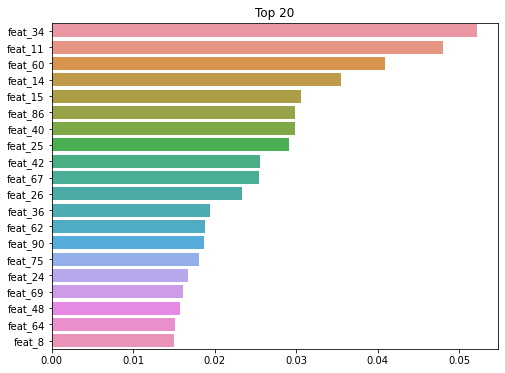

In [47]:
#피쳐 중요도
frankvals= model1.feature_importances_
frank=pd.Series(frankvals, index=X_train.columns)
frank_top20 = frank.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20')
sns.barplot(x=frank_top20, y=frank_top20.index)
plt.show()

In [48]:
#랜덤포레스트 엔트로피로 돌려보기.
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'gini', max_depth=33, random_state = 42)
model1 = classifier.fit(X_train, y_train)

prediction1 = model1.predict(X_test)
print('정확도 :', accuracy_score(y_test, prediction1))


정확도 : 0.6805106658047835


In [49]:
aaa = pd.DataFrame(prediction1)
#aaa[aaa[0].isin([1])] #0,1 아닌 소숫점 있는지 확인해 봄.
aaa[~aaa[0].isin([0])] #0,1 아닌 소숫점 있는지 확인해 봄.

,0,1,2,3,4,5,6,7,8
15,1,0,0,0,0,0,0,0,0
69,1,0,0,0,0,0,0,0,0
74,1,0,0,0,0,0,0,0,0
133,1,0,0,0,0,0,0,0,0
257,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
11881,1,0,0,0,0,0,0,0,0
11898,1,0,0,0,0,0,0,0,0
11903,1,0,0,0,0,0,0,0,0
12276,1,0,0,0,0,0,0,0,0


In [50]:
#랜덤 포레스트는 원핫 인코딩해도 0,1로만 분류된다.


In [51]:
#트리 리그레서를 써보자.
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression


# regr_1 = DecisionTreeRegressor(max_depth=26)
regr_1 = DecisionTreeRegressor(max_leaf_nodes=32)

model1 = regr_1.fit(X_train, y_train)

prediction1 = model1.predict(X_test)
# print('정확도 :', accuracy_score(y_test, prediction1))

aaa = pd.DataFrame(prediction1)

In [52]:
y_test.head()

,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
18367,0,0,1,0,0,0,0,0,0
23733,0,0,1,0,0,0,0,0,0
39686,0,0,0,0,0,1,0,0,0
12747,0,1,0,0,0,0,0,0,0
2072,0,1,0,0,0,0,0,0,0


In [53]:
#aaa.head()
print(prediction1.shape)
print()
print(prediction1[:5])

(12376, 9)

[[0.00651    0.51159098 0.3194665  0.08955224 0.00254049 0.00920927
  0.02604001 0.01873611 0.0163544 ]
 [0.03901996 0.361464   0.24016939 0.07017544 0.00604961 0.0508167
  0.10193587 0.05958863 0.0707804 ]
 [0.00675676 0.25810811 0.13648649 0.43108108 0.         0.06891892
  0.02972973 0.03648649 0.03243243]
 [0.00404654 0.73495195 0.13657056 0.03995953 0.00151745 0.01163379
  0.0091047  0.01466869 0.04754679]
 [0.00651    0.51159098 0.3194665  0.08955224 0.00254049 0.00920927
  0.02604001 0.01873611 0.0163544 ]]


In [55]:
#sgd분류기
# from sklearn.linear_model import SGDClassifier

# model1 = SGDClassifier()
# model1.fit(X_train, y_train)

# prediction1 = model1.predict(X_test)
# print('정확도 :', accuracy_score(y_test, prediction1))